<a href="https://colab.research.google.com/github/Danjstr/AIM-5010/blob/master/Copy_of_D_Strauss_M2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving hotel_bookings.csv to hotel_bookings (3).csv


In [ ]:
import pandas as pd
df0 = pd.read_csv('hotel_bookings.csv')
print (df0.head())
df0.describe()
df0.info()
df0.shape
print(df0.isnull().sum())

          hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out               2015-07-01
1  Resort Hotel            0  ...           Check-Out               2015-07-01
2  Resort Hotel            0  ...           Check-Out               2015-07-02
3  Resort Hotel            0  ...           Check-Out               2015-07-02
4  Resort Hotel            0  ...           Check-Out               2015-07-03

[5 rows x 32 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_mo

Dropped company, country and agent columns. As they have substantial amounts of missing data as na values.
Also, used forward fill as a follow up to get rid of the 4 rows with missisng data in the childrens column. 


In [ ]:
df0.drop('company', axis=1)
df0.drop('agent', axis=1)
df0.drop('country', axis=1)
df0.fillna(method= 'ffill', axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No Deposit,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No Deposit,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,No Deposit,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,304,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,240,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,89,0,Transient,104.4,0,0,Check-Out,2017-09-07


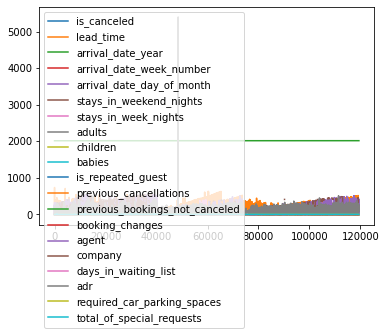

In [ ]:
import matplotlib.pyplot as plt
df0.plot(kind='line')

There is clearly an outlier behilnd the legends panel. I believe it is the adr column. It is clear that the Average Daily Rates has an extreme outlier.

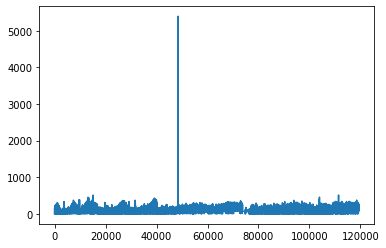

In [ ]:
import matplotlib.pyplot as plt
df0['adr'].plot(kind='line')

But we need more details to see if there are any other less obvious outliers. For this we use good old box plots.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text major ticklabel objects>)

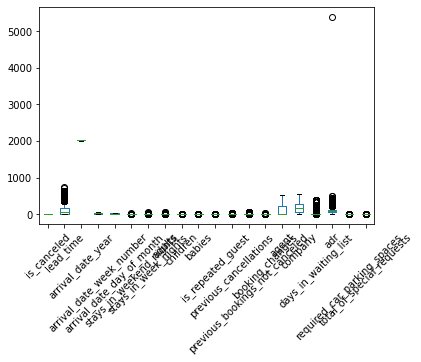

In [ ]:
import matplotlib.pyplot as plt
df0.plot(kind='box')
plt.xticks(rotation=45)

We do seem to have some indication of outliers in a couple other columns. However as we sermized with our line plot. ADR has the most serious outlier issue that may skew the data. As such I will be focusing on rectifying that.

In [ ]:
import numpy as np
Q1=np.percentile(df0['adr'],25)
Q3=np.percentile(df0['adr'],75)

In [ ]:
IQR = Q3 - Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3-1.5*IQR

In [ ]:
df1=df0[(df0['adr']>lower_limit)&(df0['adr']<upper_limit)]

In [ ]:
print(df1)

               hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
125     Resort Hotel            0  ...           Check-Out               2015-07-05
167     Resort Hotel            0  ...           Check-Out               2015-07-06
168     Resort Hotel            0  ...           Check-Out               2015-07-06
...              ...          ...  ...                 ...                      ...
118861    City Hotel            0  ...           Check-Out               2017-08-27
118963    City Hotel            0  ...           Check-Out               2017-08-27
119102    City Hotel            0  ...           Check-Out               2017-08-29
119124    City Hotel            0  ...           Check-Out               2017-08-30
119170    City Hotel            0  ...           Check-Out               201

We have lost a lot of data usinq the IQR to remove outliers. We could go back and recalculate the IQR so that we keep more of the data or we can use another method to remove the worst outliers while maintaing the most data. However for the puropse of this excersice. The method above is enought to demonstrate the best method of of removing outliers using the inter quartile range.

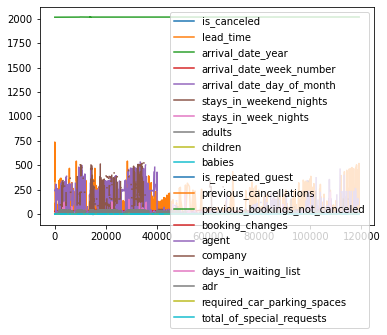

In [ ]:
df1.plot(kind='line')

Yes we have succesfully removed the most obvious outliers from adr we should technicaly repeat the process for other columns with outliers especialy the is_canceled column. But as I have already demontrated the process I shall skip that step.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text major ticklabel objects>)

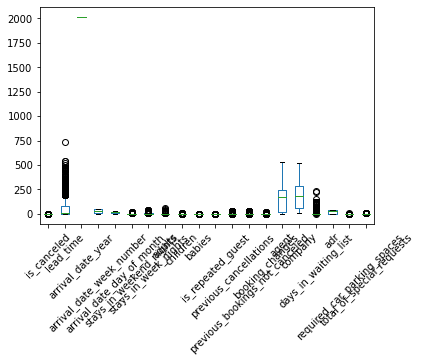

In [ ]:
df1.plot(kind='box')
plt.xticks(rotation=45)

Again the box plot shows us that we have reoved the worst of the outliersfrom the ADR. Not knowing what model this data will be used for it is a little difficult to decide on a scaler for the data.


Not knowing what model this data will be used for it is a little difficult to decide on a scaler for the data, as such I will not be going int depth on this. In spite of that difficulty we could normalize our data between 0 and 1 , assuming that it will be used for a machine learning model.
In addition to go about the process of scaling your data. All Object types in the data need to be converted to int64 or float64 Or simply be removed from the data.
After this a simple min max scaler can be used.